# Données de Ratings

In [114]:
import sys
sys.path.insert(0, '..')
import importlib

# Si vous modifiez le fichier preprocessing n'oubliez pas d'activer la ligne suivante
importlib.reload(src.preprocessing)

from src.preprocessing import prepare_corporate_ratings, annualize_and_fill_ratings, create_quarterly_rating_transitions, truncating_data

DATA_PATH = "../data/credit_ratings/data_rating_corporate_v100.xlsx"

df_initial = prepare_corporate_ratings(DATA_PATH)

# 2. Appeler la fonction de traitement ANNUEL
# Le résultat est stocké dans l'objet 'data_rating_yearly'
data_rating_yearly = annualize_and_fill_ratings(df_initial)

# 3. Appeler la fonction de traitement TRIMESTRIEL
# Le résultat est stocké dans l'objet 'data_rating_quarterly'
data_rating_quarterly = create_quarterly_rating_transitions(df_initial)

# 4. La raison pour laquelle il y a 1 an d'écart entre les 2 datasets est que la base de donénes trimestrielle intègre uniquement les transistion qui ont lieu au Y=1 doncpour que les 2 bases 
# soit équivalentes, il faut enlever la dernière année de la base annuelle en terme de période, on met un décalage d'1 an.data_rating_yearly_updated_date = truncating_data(data_rating_yearly, date_begin="2011-01-01", date_finish="2023-12-31")
data_rating_quarterly_updated_date = truncating_data(data_rating_quarterly, date_begin="2011-01-01", date_finish="2022-12-31")
data_rating_yearly_updated_date = truncating_data(data_rating_yearly, date_begin="2011-01-01", date_finish="2023-12-31")

✅ Données chargées et préparées avec succès.


c:\Users\Gaetan\Documents\GitHub\PROJET_ESA_SRESS_TEST_SQUARE_MANAGEMENT\notebooks\..\src\preprocessing.py:94: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(fill_gaps)                         # Appliquer la fonction de réindexation


Les différents secteurs sont représentés ci dessous : 

In [115]:
data_rating_quarterly_updated_date["nace"].unique()

array(['RU', 'JZ', 'OQ', 'C5', 'KZ', 'HZ', 'GZ', 'MN', 'C1', 'FZ', 'C3',
       'LZ', 'CH', 'C4', 'BZ', 'IZ', 'AZ', 'C2'], dtype=object)

In [116]:
# Si vous modifiez le fichier preprocessing n'oubliez pas d'activer la ligne suivante
# importlib.reload(src.preprocessing)
from src.preprocessing import SectorPortfolio

industrie_portfolio = SectorPortfolio.create_from_processed_data(
    name="industrie",
    sectors=['C1','C2','C3','C4','C5'], # 
    annual_data=data_rating_yearly_updated_date,
    quarterly_data=data_rating_quarterly_updated_date
)

# Créer autant de portefeuils sectoriels que vous souhaitez

# Ensuite vous pouvez appeler les différents objets :
print("✅ Portefeuille créé :", industrie_portfolio.name)
print("📊 Secteurs inclus :", industrie_portfolio.sectors)
# print("🔹 Données annuelles :", industrie_portfolio.annual_data)
# print("🔹 Données annuelles :", industrie_portfolio.quarterly_data)


✅ Portefeuille créé : industrie
📊 Secteurs inclus : ['C1', 'C2', 'C3', 'C4', 'C5']


PD TTC homogène : 1.0 %
Barrière : -2.3281995920637346
Rho : 19.3 %


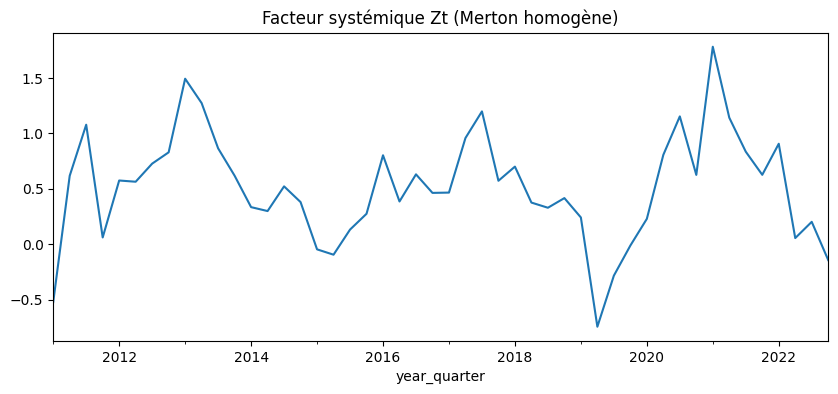

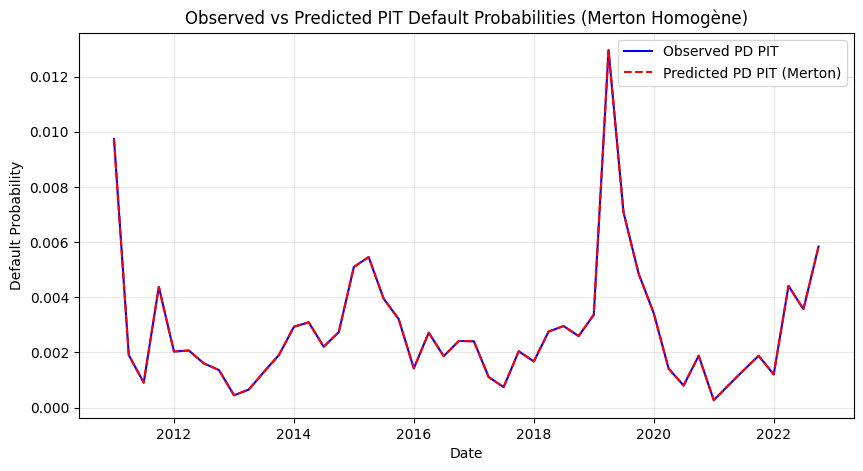

np.float64(2.2158619525977067e-35)

In [ ]:
# Si vous modifiez le fichier merton_homo n'oubliez pas d'activer la ligne suivante
# importlib.reload(src.merton_homo)
from src.merton_homo import MertonHomogeneous

merton_industry = MertonHomogeneous(industrie_portfolio)
zt_industry = merton_industry.compute()

print("PD TTC homogène :", round(merton_industry.p_ttc*100,2),"%")
print("Barrière :", merton_industry.barriers)
print("Rho :", round(merton_industry.rho*100,2),"%")

zt_industry.plotting_zt()
zt_industry.plot_pred_obs()
zt_industry.mse()

PD TTC :
 rating
AAA     0.0000
A       0.0000
BBB     0.0409
BB      0.2242
B       1.2229
C      12.3820
dtype: float64
Barrière :
 rating
AAA        -inf
A          -inf
BBB   -3.346859
BB    -2.841944
B     -2.249873
C     -1.156103
dtype: float64
Rho :
 rating
AAA    24.00
A      24.00
BBB    23.76
BB     22.73
B      18.51
C      12.02
dtype: float64


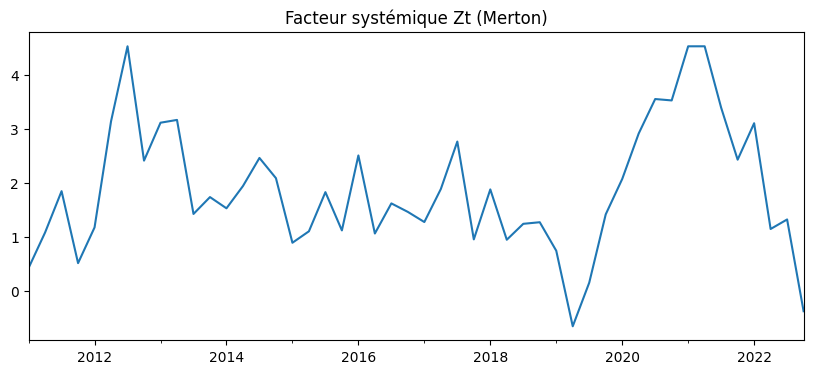

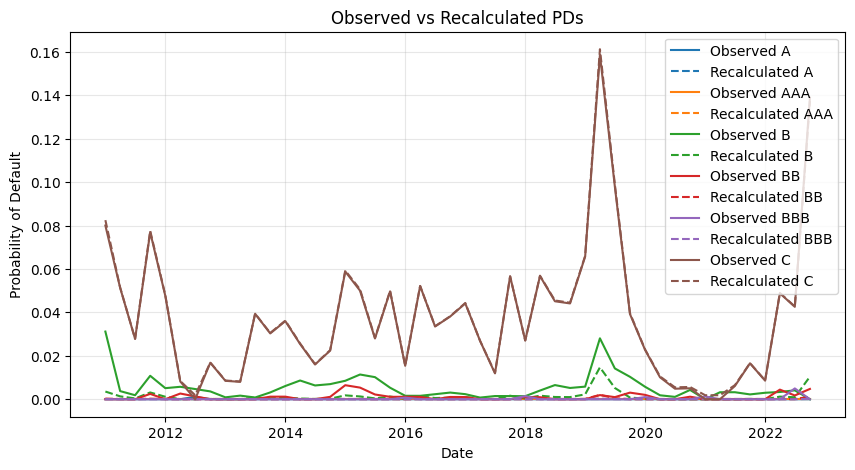

mse_global :  7.684945236500374e-06 
mse_rating : 
 rating
A      2.618358e-08
AAA    0.000000e+00
B      4.178902e-05
BB     3.044862e-06
BBB    6.257916e-07
C      6.238176e-07
dtype: float64


In [ ]:
# Si vous modifiez le fichier merton n'oubliez pas d'activer la ligne suivante
#importlib.reload(src.merton)

from src.merton import Merton

merton_industrie_portfolio = Merton(industrie_portfolio)
zt = merton_industrie_portfolio.compute()

print("PD TTC :\n", round(merton_industrie_portfolio.pd_ttc*100,4))
print("Barrière :\n", merton_industrie_portfolio.barrier)
print("Rho :\n", round(merton_industrie_portfolio.rho*100,2))

zt.plotting_zt()
zt.plot_transitions()
mse_global, mse_rating = zt.mse()

print("mse_global : ",mse_global, "\nmse_rating : \n",mse_rating)

p_ij TTC :
 next_rating    AAA      A    BBB     BB      B      C      D
rating                                                      
AAA          91.23   7.33   0.42   0.78   0.11   0.14   0.00
A             2.20  90.16   6.94   0.52   0.16   0.03   0.00
BBB           0.04   4.81  89.41   4.92   0.52   0.27   0.04
BB            0.08   0.28   6.00  83.33   9.00   1.08   0.22
B             0.04   0.06   0.58   5.52  83.70   8.88   1.22
C             0.00   0.00   0.14   1.26  17.91  68.31  12.38
Barrière :
 next_rating  AAA         A       BBB        BB         B         C         D
rating                                                                      
AAA          inf -1.354818 -2.184935 -2.318228 -2.811373 -2.986828      -inf
A            inf  2.014161 -1.429484 -2.456032 -2.902933 -3.452932      -inf
BBB          inf  3.346859  1.659627 -1.576831 -2.398047 -2.740748 -3.346859
BB           inf  3.145027  2.682512  1.525194 -1.264377 -2.225119 -2.841944
B            inf  3.335410

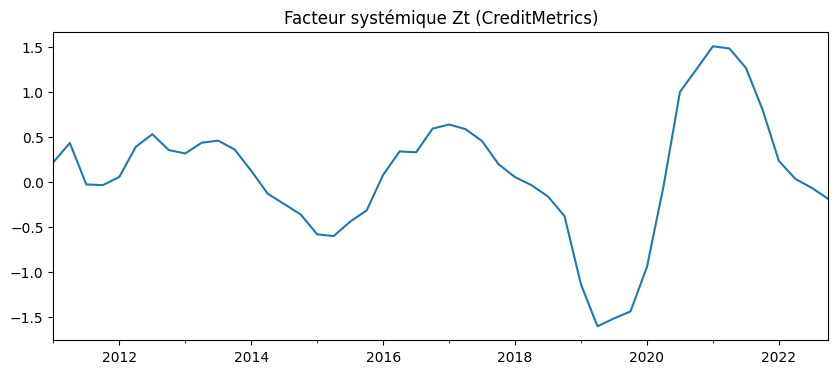

mse_global :  0.0006649482404383425 
mse_matrix : 
 next_rating             A           AAA         B        BB       BBB  \
rating                                                                  
A            8.010758e-04  2.326801e-04  0.000002  0.000009  0.000388   
AAA          1.228577e-03  1.361642e-03  0.000005  0.000088  0.000065   
B            6.118656e-07  3.291366e-07  0.000465  0.000264  0.000009   
BB           4.666560e-06  9.389372e-07  0.000468  0.001007  0.000424   
BBB          4.892804e-04  3.825075e-06  0.000016  0.000448  0.001747   
C            1.563771e-07  0.000000e+00  0.002169  0.000079  0.000064   

next_rating             C             D  
rating                                   
A            8.743831e-07  2.618358e-08  
AAA          7.456577e-06  0.000000e+00  
B            4.480075e-04  6.395174e-05  
BB           8.254455e-05  4.654048e-06  
BBB          1.837667e-05  7.329303e-07  
C            8.616424e-03  6.845495e-03  


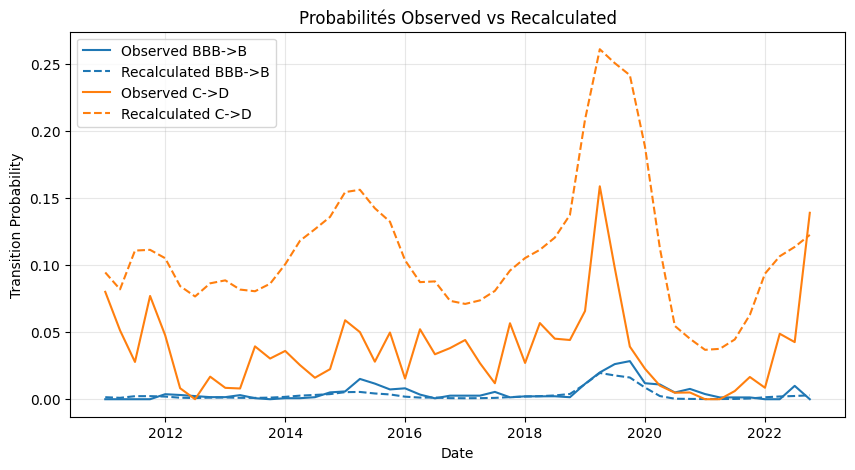

In [ ]:
# Si vous modifiez le fichier creditmetrics n'oubliez pas d'activer la ligne suivante
# importlib.reload(src.creditmetrics)
from src.creditmetrics import CreditMetrics

cm_industrie_portfolio = CreditMetrics(industrie_portfolio)
zt = cm_industrie_portfolio.compute()

print("p_ij TTC :\n", round(cm_industrie_portfolio.migration_ttc*100,2))
print("Barrière :\n", cm_industrie_portfolio.barrier_matrix)
print("Rho :\n", round(cm_industrie_portfolio.rho*100,2))
# Voir les valeurs directement
    
# Plot
zt.plotting_zt()
mse_global, mse_matrix = zt.mse()
# Calcule la MSE entre les les probabilités estimés avec le modèle de CreditMetrics (avec le  Z estimé) et les probabilités observées
print("mse_global : ",mse_global, "\nmse_matrix : \n",mse_matrix)
# Affiche les probabilités estimés avec le modèle de CreditMetrics (avec le  Z estimé) et les probabilités observées
zt.plot_transitions([["BBB", "B"], ["C", "D"]])

# Variables historiques et NGFS 

In [54]:
import sys
sys.path.insert(0, '..')

from src.other_data import data_management

DATA_PATH_HISTO = "../data/macro_data/Données_macro_hist_v2.xlsx"

data_hist = data_management(DATA_PATH_HISTO)
data_hist

var_id,EU - Central bank Intervention rate (policy interest rate),EU - Effective exchange rate,EU - GDP Growth Rate,EU - Long term interest rate,EU - Unemployment rate,US - Central bank Intervention rate (policy interest rate),US - Effective exchange rate,US - Equity prices,US - GDP Growth Rate,US - House prices (residential),US - Inflation rate,US - Long term interest rate,US - Oil price,US - Unemployment rate
2010-01-01,1.000000,104.322425,0.357380,4.064402,10.100000,0.125000,87.527759,46.875171,0.484501,86.640269,2.360525,3.716667,76.674837,9.833333
2010-04-01,1.000000,98.473032,0.999191,3.841593,10.133330,0.125000,88.939386,41.314746,0.967586,86.086237,1.767765,3.490000,78.845036,9.633333
2010-07-01,1.000000,98.062300,0.478303,3.514643,10.033330,0.125000,87.717124,45.743602,0.771085,84.491229,1.175609,2.786667,76.675000,9.466666
2010-10-01,1.000000,100.066390,0.612048,3.707037,10.033330,0.125000,84.067552,50.410959,0.525110,83.119199,1.270248,2.863333,87.033160,9.500000
2011-01-01,1.000000,99.556516,0.961402,4.302840,9.933333,0.125000,82.986452,53.144269,-0.237205,80.612840,2.141127,3.460000,105.369424,9.033334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,4.500000,111.535023,0.300445,2.961033,6.066667,5.375000,111.504760,210.614185,0.404802,141.105711,3.240480,4.160000,81.955714,3.833333
2024-04-01,4.416667,111.963459,0.298976,3.120024,6.000000,5.375000,113.708275,218.876649,0.738980,141.644220,3.199263,4.443333,84.981986,4.000000
2024-07-01,4.000000,112.816790,0.386361,2.951025,5.933333,5.208333,113.095423,230.981949,0.759510,142.303761,2.622039,3.946667,78.708317,4.166667
2024-10-01,3.166667,111.581053,0.400308,2.869136,5.833333,4.625000,115.663895,235.757927,0.607065,143.434180,2.745114,4.283333,74.000940,4.133333


In [55]:
import sys
sys.path.insert(0, '..')

from src.other_data import get_specific_data, reverse_ngfs_transformation, trimestrialiser_par_interpolation

from constant import MODELS, COUNTRIES_IMPORT

DATA_PATH_NGFS = "../data/ngfs_data/NiGEM_data.xlsx"

data_input = get_specific_data(DATA_PATH_NGFS, MODELS, COUNTRIES_IMPORT)

data_input_tr = reverse_ngfs_transformation(data_input)

data_input_tr_tri = trimestrialiser_par_interpolation(data_input_tr)

c:\Users\Gaetan\Documents\GitHub\PROJET_ESA_SRESS_TEST_SQUARE_MANAGEMENT\notebooks\..\src\other_data.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Region'] = df_filtered['Region'].str.replace('NiGEM NGFS v1.24.2|', '', regex=False)
c:\Users\Gaetan\Documents\GitHub\PROJET_ESA_SRESS_TEST_SQUARE_MANAGEMENT\notebooks\..\src\other_data.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baseline["Variable"] = df_baseline["Variable"].str.replace(r'; %|; MnToe|; local currency per US\$|; l

# Importation TES

In [ ]:
import sys
sys.path.insert(0, '..')

# Si vous modifiez le fichier import_tes n'oubliez pas d'activer la ligne suivante
#importlib.reload(src.import_tes)

from src.import_tes import importing_tes

path = '../data/international_TES'


dfs, df_pays, descp_nace = importing_tes(path) 

# dfs est un dictionnaire qui se lit dfs["20XX"] et qui met le TES pour l'année en question.
# df_pays montre tous les acrinymes des pays.
# descp_nace montre les descriptions de la segmentation NACE 88 et NACE 17

c:\Users\Gaetan\Documents\GitHub\PROJET_ESA_SRESS_TEST_SQUARE_MANAGEMENT\venv\Lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: ColItems!$A:$A.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
c:\Users\Gaetan\Documents\GitHub\PROJET_ESA_SRESS_TEST_SQUARE_MANAGEMENT\venv\Lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: RowItems!$A:$A.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
c:\Users\Gaetan\Documents\GitHub\PROJET_ESA_SRESS_TEST_SQUARE_MANAGEMENT\notebooks\..\src\import_tes.py:54: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return dfs, df_pays, descp_nace


Ici deux options s'offrent à vous, je vous propose une fonction qui aggrège les TES pour tous les pays. Vous pourrez sinon filtrez en amont sur un pays puis appliquer la fonction qui vous enlevera la mention du pays. Vous pourrez vous aider du df_pays qui mentionne les acronymes des différents pays.

In [ ]:
# Si vous modifiez le fichier import_tes n'oubliez pas d'activer la ligne suivante
# importlib.reload(src.import_tes)
from src.import_tes import leaving_countries, filtering_country

df_no_countries = leaving_countries(dfs)

df_USA = filtering_country(dfs, "USA")


La prochaine fonction permet de faire basculer du NACE 88 au NACE 17

In [ ]:
# Si vous modifiez le fichier import_tes n'oubliez pas d'activer la ligne suivante
# importlib.reload(src.import_tes)
from src.import_tes import changing_nace_framework

df_nace17 = changing_nace_framework(df_USA, descp_nace)
df_nace17

c:\Users\Gaetan\Documents\GitHub\PROJET_ESA_SRESS_TEST_SQUARE_MANAGEMENT\notebooks\..\src\import_tes.py:147: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_nace17 = df_nace17.groupby(df_nace17.index).sum()
c:\Users\Gaetan\Documents\GitHub\PROJET_ESA_SRESS_TEST_SQUARE_MANAGEMENT\notebooks\..\src\import_tes.py:147: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_nace17 = df_nace17.groupby(df_nace17.index).sum()
c:\Users\Gaetan\Documents\GitHub\PROJET_ESA_SRESS_TEST_SQUARE_MANAGEMENT\notebooks\..\src\import_tes.py:147: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_nace17 = df_nace17.groupby(df_nace17.index).sum()
c:\Users\Gaetan\Documents\GitHub\PROJET_ESA_SRESS_TEST_SQUARE_MANAGEMENT\notebooks\..\src\import_tes.py:147: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.gro

{'2011':             AZ          BZ           C1           C2          C3           C4  \
 AZ  59741.0192    201.9627  179683.2755      20.7081      1.9319       1.2871   
 BZ   5967.4198  99268.2512   13308.3431  223323.7502   6017.6662    4753.0092   
 C1  31829.1175    136.6936  133392.0835     439.6411    260.8318     211.7362   
 C2  12417.5844  39913.1094    4274.6797   17658.3518   3565.0322    1415.2429   
 C3   4254.3465  11809.6716    4258.3970     308.4537  57965.3979   27726.8145   
 C4    875.9513   2478.9546    1778.7030      93.8016  10785.1424  117348.9096   
 C5  27753.2301  16202.8302   45803.6612   12603.6213  28842.7378   35513.8645   
 CH   1727.1573  12198.6444   14667.0834     479.4013  73394.8689   76434.2335   
 FZ   1530.2046  11194.2921    1545.7845    5641.4273   1133.3962     847.9223   
 GZ  43519.9048  28933.1227  120760.1868   12889.4406  57568.2270   67107.5988   
 HZ   8060.5961  21137.8361   21748.9494   41315.2210   9575.1203    8227.6284   
 IZ    5